In [1]:
import numpy as np
from io import StringIO
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mylibrary as mylib
from mylibrary import euclidean_distance

%matplotlib inline

In [2]:
def get_centers_bank(data, k, seed=41):
    """
    Purpose:
        recore and return the results of each step of k-mean algorithm
    Input:
        data: a two dimension matrix
        k: int, number of clusters
        seed: seed for random number generator
    """
    init_centers = data[np.random.RandomState(seed=seed).permutation(data.shape[0])[0:k]]
    centers_bank = [[[center, np.array([])] for center in init_centers]]
    itr = 1
    while True:
        if(itr % 5 == 0):
            print("itr:", itr)
        dis_matrix = np.empty((0,data.shape[0]))
        for row in centers_bank[-1]:
            dis_matrix = np.vstack((dis_matrix, np.sum(np.square(data - row[0]), axis=1)))
        belongs = np.argmin(dis_matrix, axis=0)
        centers = []
        check_same = True
        for i in range(k):
            index = np.where(belongs == i)[0]
            centers_bank[-1][i][1] = index
            center = np.mean(data[index],axis=0)
            check_same  = check_same and np.all(center == centers_bank[-1][i][0])
            centers.append([center, np.array([])])
        if check_same == True:
            break
        centers_bank.append(centers)
        itr += 1
    print("total itr:",itr)
    return centers_bank

In [3]:
def get_centers(centers_bank, itr=-1):
    """
    Purpose:
        Return all centers for specific iteration of K-mean
    Input:
        centers_bank: the database to store all iterations information for K-mean
        itr: int, iteration number.
    """
    centers_matrix = np.empty((0,data.shape[1]))
    for row in centers_bank[itr]:
        centers_matrix = np.vstack((centers_matrix, row[0]))
    return centers_matrix

In [11]:
def plot_k_min(data, centers, itr):
    label_set = set(np.arange(len(centers)))
    color_map = dict(zip(label_set, cm.rainbow(np.linspace(0, 1, len(label_set)))))
    for label in label_set:
        index = centers[label][1]
        plt.scatter(data[index][:,0], data[index][:,1], s=20, c=color_map[label],
                    alpha=0.3, label=label)
        plt.scatter(centers[label][0][0], centers[label][0][1], s=100, c=color_map[label],
                    alpha=1.0, marker='x')
    plt.title("iteration: "+ str(itr))
    plt.legend(loc='best')
    plt.show()
    plt.close()

## Test

### my data

total itr: 4


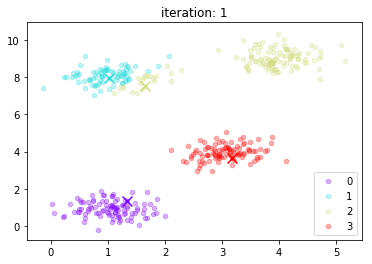

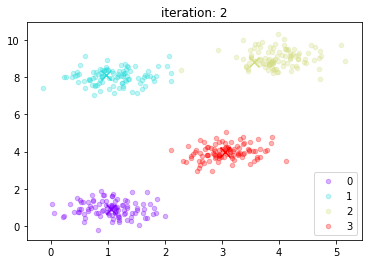

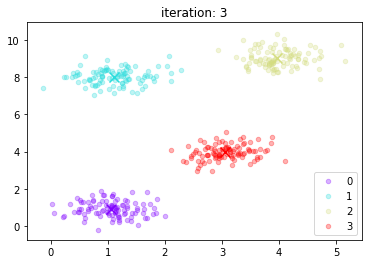

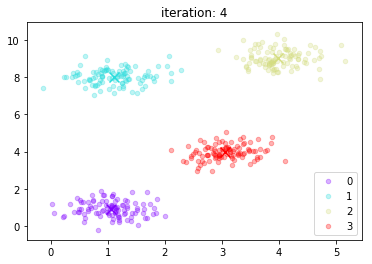

In [12]:
X = mylib.generate_data()
#X = generate_circle()
k = 4
centers_bank = get_centers_bank(X, k, 20)
for i in range(len(centers_bank)):
    plot_k_min(X,centers_bank[i], i+1)

### given data

itr: 5
itr: 10
itr: 15
total itr: 18


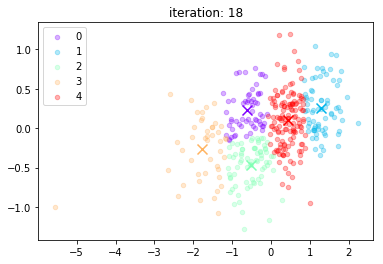

In [13]:
data, labels = mylib.get_data("../data/cho.txt")
k = 5
data_pca = mylib.pca(data)
centers_bank = get_centers_bank(data_pca, k,20)
plot_k_min(data_pca,centers_bank[-1],len(centers_bank))
        

itr: 5
itr: 10
itr: 15
total itr: 19


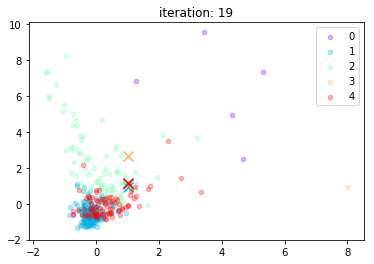

In [14]:
data, labels = mylib.get_data("../data/iyer.txt")
k = 5
data_pca = mylib.pca(data)
centers_bank = get_centers_bank(data, k,20)
plot_k_min(data_pca,centers_bank[-1], len(centers_bank))

##  Test

#### PCA after K-min

In [137]:
def plot_data(data_pca, centers_pca, centers):
    label_set = set(np.arange(len(centers_pca)))
    color_map = dict(zip(label_set, cm.rainbow(np.linspace(0, 1, len(label_set)))))
    for label in label_set:
        index = centers[label][1]
        plt.scatter(data_pca[index][:,0], data_pca[index][:,1], s=20, c=color_map[label],
                    alpha=0.1, label=label)
        plt.scatter(centers_pca[label][0], centers_pca[label][1], s=100, c=color_map[label],
                    alpha=0.8, marker='x')
    plt.title("pca")
    plt.legend(loc='best')
    plt.show()
    plt.close()

In [138]:
def plot_itr(data, centers_bank, itr=-1):
    data_pca = data.copy()
    for row in centers_bank[itr]:
        data_pca = np.vstack((data_pca, row[0]))
    pca_data = pca(data_pca)
    pca_centers = pca_data[-k:]
    pca_data = pca_data[0:-k]
    plot_data(pca_data, pca_centers, centers_bank[itr])

In [139]:
"""
The plot image will change because I combine centers with data to do pca
"""
data, labels = get_data("../data/cho.txt")
k = 5
centers_bank = get_centers_bank(data, k)
#pca_data = pca(data)
#pca_centers = pca(get_centers(centers_bank, -1))
#plot_data(pca_data, pca_centers, centers_bank[-1])
#plot_itr(data, centers_bank,5)

itr: 5
itr: 10
total itr: 12


itr: 5
itr: 10
itr: 15
itr: 20
total itr: 20


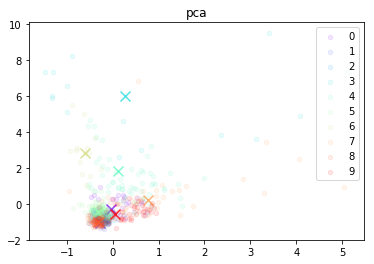

In [142]:
data, labels = get_data("../data/iyer.txt")
k = 10
centers_bank = get_centers_bank(data, k)
plot_itr(data, centers_bank,1)